## Anomaly Detection SOM Experiment

Insert Code wherever represented with "#***************#"

In [4]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
# Minisom library and module is used for performing Self Organizing Maps 
from minisom import MiniSom 

In [5]:
# Loading Data 
data = pd.read_csv('Credit_Card_Applications.csv') 

# X  
data 

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,15808223,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
686,15769980,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
687,15675450,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
688,15776494,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1


In [6]:
# Shape of the data: 
""" 
    Write Code to display shape of data
"""
print(data.shape)
#********************#

(690, 16)


In [7]:
# Info of the data: 
""" 
    Write Code to display information of data using inbuilt info function
"""
data.info()
#********************#

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  690 non-null    int64  
 1   A1          690 non-null    int64  
 2   A2          690 non-null    float64
 3   A3          690 non-null    float64
 4   A4          690 non-null    int64  
 5   A5          690 non-null    int64  
 6   A6          690 non-null    int64  
 7   A7          690 non-null    float64
 8   A8          690 non-null    int64  
 9   A9          690 non-null    int64  
 10  A10         690 non-null    int64  
 11  A11         690 non-null    int64  
 12  A12         690 non-null    int64  
 13  A13         690 non-null    int64  
 14  A14         690 non-null    int64  
 15  Class       690 non-null    int64  
dtypes: float64(3), int64(13)
memory usage: 86.4 KB


In [8]:
# Defining X variables for the input of SOM 
X = data.iloc[:, 1:14].values 
y = data.iloc[:, -1].values 

# X variables: 
""" 
    Convert X variable into a pandas DataFrame
"""
X = pd.DataFrame(X)

In [9]:
from sklearn.preprocessing import MinMaxScaler 

sc = MinMaxScaler(feature_range = (0, 1)) 
""" 
    apply fit_transform using the created MinMaxScaler sc on variable X 
"""
X = sc.fit_transform(X)
pd.DataFrame(X) 

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.0,0.125263,0.409286,0.5,0.230769,0.375,0.055614,0.0,0.0,0.000000,1.0,0.5,0.05
1,0.0,0.134135,0.250000,0.5,0.538462,0.375,0.005789,0.0,0.0,0.000000,0.0,0.5,0.08
2,0.0,0.238045,0.062500,0.0,0.230769,0.375,0.043860,0.0,0.0,0.000000,1.0,0.5,0.14
3,0.0,0.119098,0.410714,0.0,0.307692,0.250,0.000000,1.0,1.0,0.164179,1.0,0.5,0.00
4,1.0,0.096541,0.291786,0.5,0.384615,0.375,0.068772,1.0,1.0,0.208955,0.0,0.5,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1.0,0.267970,0.375000,0.5,1.000000,0.375,0.228070,1.0,0.0,0.000000,0.0,0.5,0.00
686,1.0,0.104060,0.014821,0.5,0.538462,0.375,0.004386,0.0,0.0,0.000000,0.0,0.5,0.00
687,0.0,0.076391,0.340714,0.5,0.384615,0.375,0.002982,1.0,0.0,0.000000,0.0,0.5,0.05
688,0.0,0.205564,0.517857,0.5,1.000000,0.875,0.108246,1.0,1.0,0.014925,0.0,0.5,0.06


In [10]:
# Set the hyper parameters 
som_grid_rows = 10 
som_grid_columns = 10 
iterations = 20000 
sigma = 1 
learning_rate = 0.5 

# define SOM: 
""" 
    Create MiniSom Model using above hyperparemeters with
    x = som_grid_rows
    y = som_grid_columns
    sigma = sigma
    input_len = 13
    and learning_rate = learning_rate
"""
som = MiniSom(x = som_grid_rows, y = som_grid_columns, input_len = 13, sigma = sigma, learning_rate = learning_rate)

In [11]:
# Initializing the weights 
som.random_weights_init(X) 

# Training 
"""
    Train som model using train_random on varible X for above mentioned iterations
"""
som.train_random(X, iterations)
 
# Returns the distance map from the weights: 
som.distance_map() 

array([[0.21195007, 0.39417836, 0.41783987, 0.40580282, 0.23475663,
        0.27789501, 0.33065309, 0.41436762, 0.29414014, 0.24781469],
       [0.39568583, 0.72488082, 0.61983696, 0.55580872, 0.47185223,
        0.50866526, 0.52810019, 0.55187603, 0.47369144, 0.34426884],
       [0.35058535, 0.69630852, 0.74999324, 0.67333265, 0.6502259 ,
        0.52797931, 0.65073597, 0.62774012, 0.62612459, 0.36495063],
       [0.32749134, 0.66789851, 0.85923248, 0.69824953, 0.57018283,
        0.6043957 , 0.66982835, 0.7013434 , 0.71759899, 0.42893366],
       [0.43727706, 0.58993957, 0.76477909, 0.60648681, 0.54986012,
        0.41746702, 0.72363122, 0.91847568, 0.66870492, 0.38793746],
       [0.40446064, 0.8278208 , 0.6386131 , 0.60708416, 0.48128714,
        0.67378625, 0.78492592, 0.82474543, 0.59068593, 0.3560351 ],
       [0.35377067, 0.59882757, 0.55878043, 0.58123107, 0.704056  ,
        0.70740297, 1.        , 0.77790869, 0.65543413, 0.36330752],
       [0.27458419, 0.42468045, 0.5721787

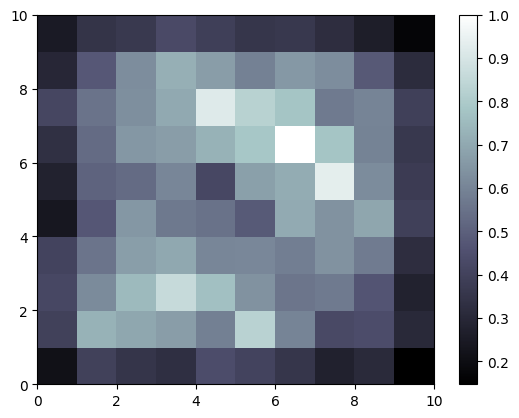

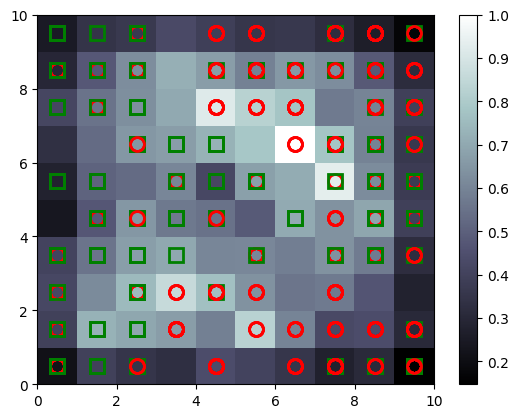

In [12]:
from pylab import plot, axis, show, pcolor, colorbar, bone 

bone() 
pcolor(som.distance_map().T)       # Distance map as background 
colorbar() 
show() 
bone() 
pcolor(som.distance_map().T) 
colorbar() #gives legend 

markers = ['o', 's']                 # if the observation is fraud then red circular color or else green square 
colors = ['r', 'g'] 

for i, x in enumerate(X): 
    w = som.winner(x) 
    plot(w[0] + 0.5, 
         w[1] + 0.5, 
         markers[y[i]], 
         markeredgecolor = colors[y[i]], 
         markerfacecolor = 'None', 
         markersize = 10, 
         markeredgewidth = 2) 

show() 

In [13]:
"""
    Write code to store som win_map into a variable names mappings
"""
mappings = som.win_map(X)
mappings 
mappings.keys() 
"""
    Write code to find the length of mapping.keys()
"""
len(mappings.keys())

79

In [14]:
mappings[(9,8)] 
frauds = np.concatenate((mappings[(0,9)], mappings[(8,9)]), axis = 0) 
frauds 

array([[1.        , 0.69669173, 0.51785714, 0.5       , 0.        ,
        0.        , 0.63157895, 1.        , 1.        , 0.2238806 ,
        1.        , 0.5       , 0.        ],
       [1.        , 0.61398496, 0.33625   , 0.5       , 0.        ,
        0.        , 0.50578947, 1.        , 1.        , 0.1641791 ,
        1.        , 0.5       , 0.015     ],
       [1.        , 0.64406015, 0.66071429, 0.5       , 0.07692308,
        0.5       , 0.52631579, 1.        , 1.        , 0.25373134,
        1.        , 0.5       , 0.        ],
       [1.        , 0.2793985 , 0.125     , 0.5       , 0.23076923,
        0.375     , 0.01754386, 0.        , 0.        , 0.        ,
        1.        , 0.5       , 0.116     ],
       [1.        , 0.44240602, 0.17857143, 0.5       , 0.15384615,
        0.5       , 0.07894737, 0.        , 0.        , 0.        ,
        1.        , 0.5       , 0.0705    ],
       [1.        , 0.14030075, 0.08928571, 0.5       , 0.        ,
        0.        , 0.00298

In [15]:
# the list of customers who are frauds: 
"""
    Convert he fraud customers back into original values using Standard Scaler(sc) inverse_transform and store into a variable named frauds1
"""
frauds1 = sc.inverse_transform(frauds)
pd.DataFrame(frauds1) 

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.0,60.08,14.500,2.0,1.0,1.0,18.000,1.0,1.0,15.0,1.0,2.0,0.0
1,1.0,54.58,9.415,2.0,1.0,1.0,14.415,1.0,1.0,11.0,1.0,2.0,30.0
2,1.0,56.58,18.500,2.0,2.0,5.0,15.000,1.0,1.0,17.0,1.0,2.0,0.0
3,1.0,32.33,3.500,2.0,4.0,4.0,0.500,0.0,0.0,0.0,1.0,2.0,232.0
4,1.0,43.17,5.000,2.0,3.0,5.0,2.250,0.0,0.0,0.0,1.0,2.0,141.0
5,1.0,23.08,2.500,2.0,1.0,1.0,0.085,0.0,0.0,0.0,1.0,2.0,100.0
6,1.0,17.25,3.000,2.0,4.0,4.0,0.040,0.0,0.0,0.0,1.0,2.0,160.0
7,1.0,35.58,0.750,2.0,4.0,4.0,1.500,0.0,0.0,0.0,1.0,2.0,231.0
8,1.0,35.00,2.500,2.0,3.0,4.0,1.000,0.0,0.0,0.0,1.0,2.0,210.0
9,1.0,34.17,2.750,2.0,3.0,5.0,2.500,0.0,0.0,0.0,1.0,2.0,232.0
